# EDA Layer

## **Description:**

- Now we are going to attend a new DS step - **Exploratory Data Analysis**. We want to produce ML model for a business problem but are still unfamiliar with the underlying processes. Now, we have an opportunity to tackle this problem, 
- You need to explore your data to answer the following questions:
    - What I'm working with ?
    - What are the main patterns and tendencies with my data ?
    - How do my data entities interact ?
    - What should I do with my data to obtain good features ?
    - What are the problems with the probable prediction ?
    - How could I manually make predict based on data ? 


## **Possible Tools:**

- Data visualisation - seaborn, plotly, matplotlib
- Data processing - pandas, numpy, statsmodels, scikit-learn 
- Whatever you might find useful

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../")
import scripts.eda as eda  # eda.py module
from scripts.etl import transform_df_types

In [2]:
train_df = pd.read_csv("../data/merged_train.csv")

train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.0,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.0,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,899.0,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        int64  
 6   month               int64  
 7   year                int64  
 8   item_name           object 
 9   item_category_id    int64  
 10  item_category_name  object 
 11  shop_name           object 
dtypes: float64(1), int64(7), object(4)
memory usage: 268.8+ MB


In [5]:
train_df = transform_df_types(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype   
---  ------              -----   
 0   date                category
 1   date_block_num      float32 
 2   shop_id             float32 
 3   item_id             float32 
 4   item_price          float32 
 5   item_cnt_day        float32 
 6   month               float32 
 7   year                float32 
 8   item_name           category
 9   item_category_id    float32 
 10  item_category_name  category
 11  shop_name           category
dtypes: category(4), float32(8)
memory usage: 107.1 MB


## Load and transform **aggregated_train** dataset

In [6]:
aggregated_train_df = pd.read_csv("../data/merged_train_aggregated.csv")

aggregated_train_df = transform_df_types(aggregated_train_df)
aggregated_train_df["shop_city"] = (
    aggregated_train_df["shop_name"].str.split(" ").str[0]
)

## Load and transform **full_train** dataset

It contains **"item_cnt_month"** value for each ("date_block_num", "shop_id") pair

In [2]:
full_train_df = pd.read_csv("../data/full_train.csv")

In [3]:
full_train_df.head(3)

,date_block_num,shop_id,item_id,item_cnt_month,month,year,item_name,item_category_id,item_category_name,shop_name
0,0,2,12,0,0.0,0.0,*МИХЕЙ И ДЖУМАНДЖИ Сука любовь,55,Музыка - CD локального производства,"Адыгея ТЦ ""Мега"""
1,0,2,19,0,0.0,0.0,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,Кино - DVD,"Адыгея ТЦ ""Мега"""
2,0,2,27,1,0.0,0.0,"007 Legends [PS3, русская версия]",19,Игры - PS3,"Адыгея ТЦ ""Мега"""


In [4]:
full_train_df = transform_df_types(full_train_df, float_type=np.float16)

In [5]:
full_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13309102 entries, 0 to 13309101
Data columns (total 10 columns):
 #   Column              Dtype   
---  ------              -----   
 0   date_block_num      float16 
 1   shop_id             float16 
 2   item_id             float16 
 3   item_cnt_month      float16 
 4   month               float16 
 5   year                float16 
 6   item_name           category
 7   item_category_id    float16 
 8   item_category_name  category
 9   shop_name           category
dtypes: category(3), float16(7)
memory usage: 229.1 MB


## We can analyze data sequentially column by column. Let's start with **date**

## **date** feature

In [10]:
train_df["date_month"] = train_df["date"].dt.month
train_df["date_year"] = train_df["date"].dt.year
train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year
0,2013-01-02,0,59,22154,999.0,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2013
1,2013-01-03,0,25,2552,899.0,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
2,2013-01-05,0,25,2552,899.0,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013


Look at trend lines for each year

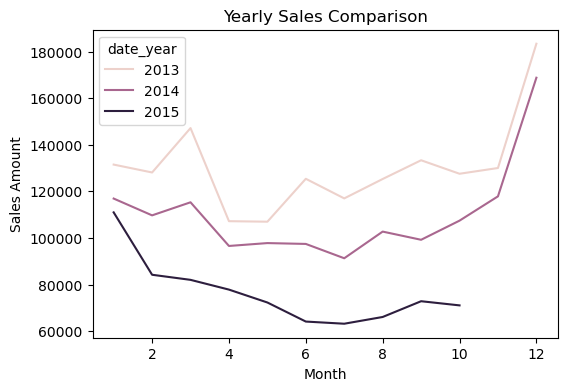

In [11]:
train_year_month = (
    train_df.groupby(["date_year", "date_month"])
    .agg({"item_cnt_day": "sum"})
    .reset_index()
)

plt.figure(figsize=(6, 4))
ax = sns.lineplot(
    x="date_month", y="item_cnt_day", hue="date_year", data=train_year_month
)
plt.title("Yearly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales Amount");

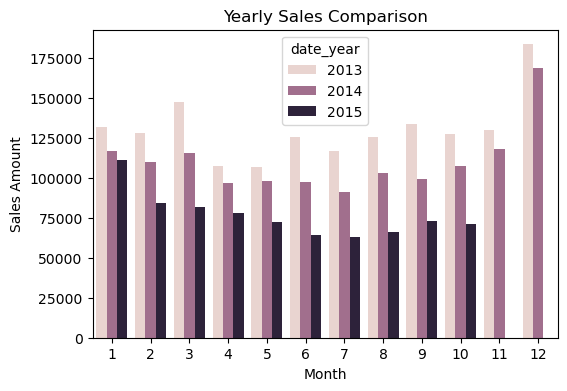

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    x="date_month", y="item_cnt_day", hue="date_year", data=train_year_month
)
plt.title("Yearly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales Amount");

The number of shop visits per year

In [13]:
train_df.groupby(["date_year"])["date"].count()

date_year
2013    1267561
2014    1055861
2015     612426
Name: date, dtype: int64

Average number of items sold during one visit per year

In [14]:
train_df.groupby(["date_year"])["item_cnt_day"].sum() / train_df.groupby(["date_year"])[
    "date"
].count()

date_year
2013    1.232865
2014    1.251007
2015    1.248451
dtype: float64

Now we can notice, that as the year number increases, the whole number of items sold per month decreases (while the trend lines look very similar).
From one point of view, this may be the result of the number of purchase observations decreasing by 16.7% in 2014 comparing to 2013. I believe, it doesn't
refer to data collecting issues and all the data is complete. What's more, the average number of items sold during one visit per year increased a little, so this may be just a small change in behavior of customers :)

### And in general, **month** and **year** are truly informative for future predictions because of the trend observed as well as the number of items sold reduction.

## Let's explore the reasons of sales reduction more

### 1. Show monthly number of shops with non-zero sales

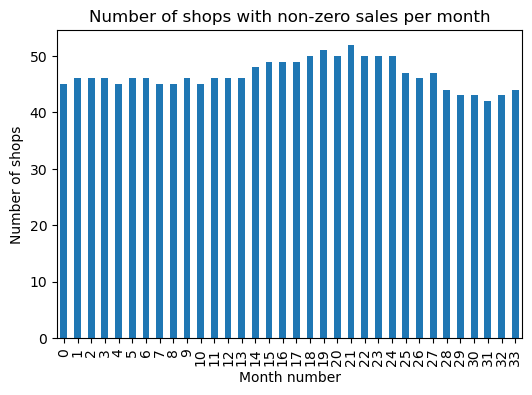

In [15]:
not_zero_sales = full_train_df[full_train_df["item_cnt_month"] != 0]

not_zero_sales_aggregated = not_zero_sales.groupby(["date_block_num"])[
    "shop_name"
].nunique()
not_zero_sales_aggregated.plot(
    x="date_block_num",
    y="shop_name",
    kind="bar",
    title="Number of shops with non-zero sales per month",
    ylabel="Number of shops",
    xlabel="Month number",
    figsize=(6, 4),
);

There are no considerable signs of some shops closing forever, however it's better to analyze them separately. This will be done below:

I want to get lists of shops with zero sales for each month

In [16]:
total_sales = full_train_df.groupby(["shop_id"], observed=False)["item_cnt_month"].sum()
total_sales = pd.DataFrame(total_sales).reset_index()
filtered_df = full_train_df.groupby(["date_block_num", "shop_id"]).filter(
    lambda x: (x["item_cnt_month"] == 0).all()
)

unique_combinations = filtered_df[["date_block_num", "shop_id"]].drop_duplicates()
unique_combinations = unique_combinations.merge(total_sales, on="shop_id")

unique_combinations.head(5)

,date_block_num,shop_id,item_cnt_month
0,0,5,42762
1,0,9,15866
2,0,17,25838
3,0,20,5872
4,0,33,5482


Plot shops closed during a particular month

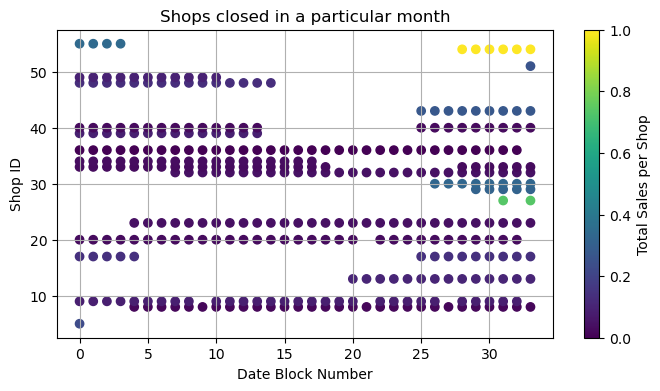

In [17]:
norm = plt.Normalize(
    vmin=unique_combinations["item_cnt_month"].min(),
    vmax=unique_combinations["item_cnt_month"].max(),
)
colors = plt.cm.viridis(norm(unique_combinations["item_cnt_month"]))

# Step 3: Plot the scatter plot
plt.figure(figsize=(8, 4))
scatter = plt.scatter(
    unique_combinations["date_block_num"], unique_combinations["shop_id"], c=colors
)

cbar = plt.colorbar(scatter)
cbar.set_label("Total Sales per Shop")

# Step 4: Adding plot details
plt.xlabel("Date Block Number")
plt.ylabel("Shop ID")
plt.title("Shops closed in a particular month")
plt.grid(True)
plt.show();

### We can notice, that the number of almost permanently closed shops (such shops, that their line of dots is almost 33 months long) is approximately the same as the number of shops that didn't have any sales only for smaller periods of time(up to 10 months). Moreover, almost all closed shops have relatively small total sales (colored in purple and blue). 

### This fact can be later used to create a new feature.

### 2. Plot average **item_cnt_month** for top **5** shops by month

Get top 5 shops by total sales:

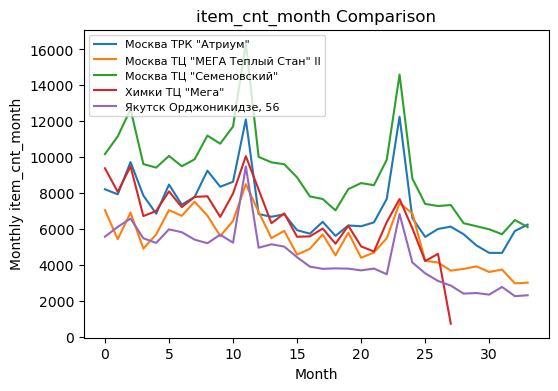

In [18]:
eda.plot_feature_comparison(aggregated_train_df, "item_cnt_month", "shop_name")

Though obviously there are high peaks in December and they don't disappear with years, total sales amount decreases across top 5 popular shops. That's why, it seems that **"1C"** shops and their products in general got less popular with time. The sphere of hard copies of films, games, computer programs and so on began to give way to digital versions of the products.

### 2.5 Look at less popular shops

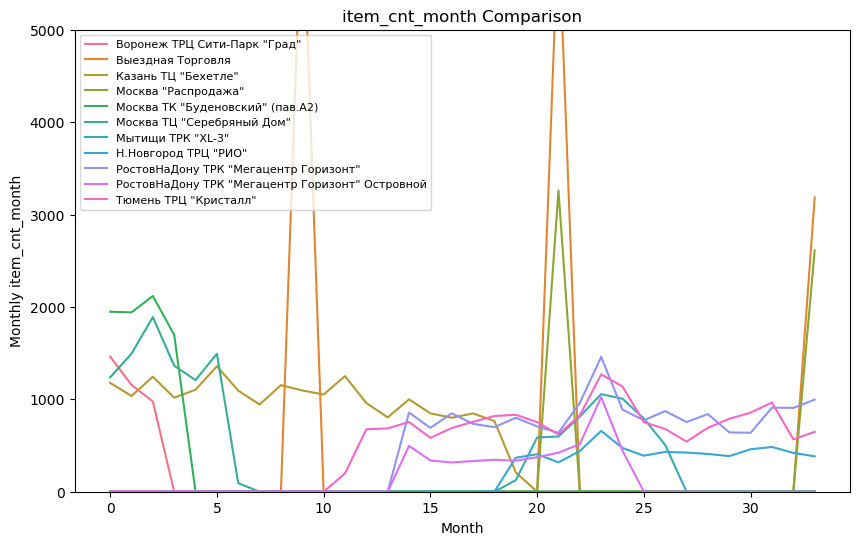

In [19]:
eda.plot_feature_comparison(
    full_train_df,
    "item_cnt_month",
    "shop_name",
    left_lim_objects=-12,
    right_lim_objects=-1,
    fig_size=(10, 6),
    ylim=5000,
)

This plot shows 11 least popular shops that are most likely to close. The lines that start from 0 sales on the left represent shops that were closed at the beginning of observations; the ones that end in zero refer to shops that had 0 sales in the final month.

When there are shops that "finished" with 0 sales in the last month (I counted approximately 7 of them), the amount of shops that were closed for a period of time at the beginning or in the middle of the period is more or less the same. The **"Number of shops with non-zero sales per month"** graph plotted above confirms that.

### 3. Plot total **item_cnt_month** for top **5** categories by month

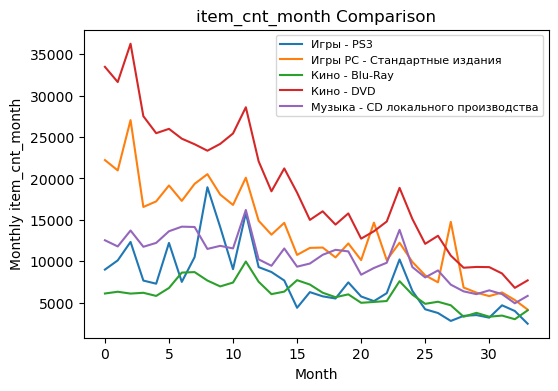

In [20]:
eda.plot_feature_comparison(
    aggregated_train_df, "item_cnt_month", "item_category_name", legend_loc=1
)

The same situation is within top 5 popular categories

### 4. Look at some categories, that are unlikely to suffer from being replaced by digital versions

In [21]:
aggregated_train_df["large_category_name"] = aggregated_train_df[
    "item_category_name"
].apply(lambda x: x.split(" - ")[0])
aggregated_train_df["large_category_name"].unique()

array(['Игры', 'Кино', 'Книги', 'Программы', 'Игры PC', 'Подарки',
       'Музыка', 'Аксессуары', 'Карты оплаты', 'Игровые консоли',
       'Чистые носители (штучные)', 'Служебные', 'Элементы питания',
       'Чистые носители (шпиль)', 'Доставка товара', 'PC',
       'Карты оплаты (Кино, Музыка, Игры)', 'Билеты (Цифра)', 'Игры MAC',
       'Игры Android'], dtype=object)

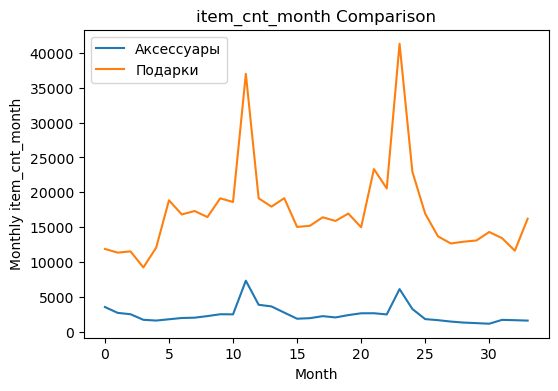

In [22]:
eda.plot_feature_comparison(
    aggregated_train_df,
    "item_cnt_month",
    "large_category_name",
    top_objects=["Подарки", "Аксессуары"],
    legend_size=10,
)

### There is no reduction in the amount of items sold within "Presents" and "Accessories" categories  --->  the theory introduced earlier seems to get confirmed: digital versions of items are replacing its solid analogues. 

## Analyze shops **revenue**

### 1. Calculate **revenue**

In [23]:
train_df["revenue"] = train_df["item_price"] * train_df["item_cnt_day"]
train_aggregated = (
    train_df.groupby(["date_block_num", "shop_id", "item_id"])
    .agg({"revenue": "sum"})
    .reset_index()
)
aggregated_train_df["revenue"] = train_aggregated["revenue"]

### 2. Plot average **revenue** for top **5** shops by month

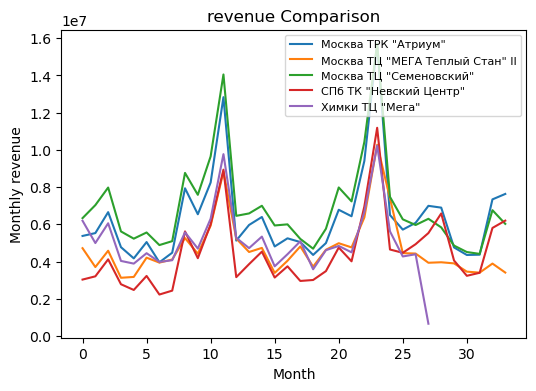

In [24]:
eda.plot_feature_comparison(aggregated_train_df, "revenue", "shop_name", legend_loc=1)

### 3. Plot average **revenue** for mid **5** shops by month

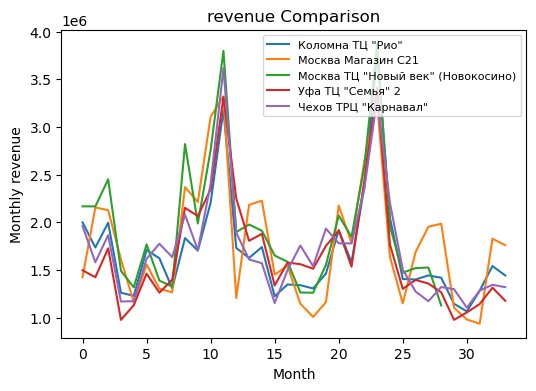

In [25]:
eda.plot_feature_comparison(
    aggregated_train_df,
    "revenue",
    "shop_name",
    left_lim_objects=23,
    right_lim_objects=28,
    legend_loc=1,
)

These shops don't show significant negative trend too.

### The revenue also has peaks in December, but in contrast to the **item_cnt_month** feature, it doesn't decrease with time or at least decreases very little. This means, that in order to keep the revenue the same shops could possibly increase the average item price slightly. 

### 4. Calculate **average price** for top items in 'Москва'

I'm limiting the city being analyzed, as averaging across all data points can make some unusual properties of data less distinct.

In [26]:
column_aggregated = aggregated_train_df.groupby(["item_name"], observed=False)[
    "item_cnt_month"
].sum()
column_aggregated = pd.DataFrame(column_aggregated)
column_aggregated.reset_index(inplace=True)
column_aggregated = column_aggregated.sort_values(["item_cnt_month"], ascending=False)

top_items = column_aggregated["item_name"][:10].values
top_items

array(['Фирменный пакет майка 1С Интерес белый (34*42) 45 мкм',
       'Diablo III [PC, Jewel, русская версия]',
       'Grand Theft Auto V [PS3, русские субтитры]',
       'Прием денежных средств для 1С-Онлайн',
       'Playstation Store пополнение бумажника: Карта оплаты 1000 руб.',
       'Grand Theft Auto V [Xbox 360, русские субтитры]',
       'Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1108A/B01)',
       'Grand Theft Auto V [PC, русские субтитры]',
       'Battlefield 4 [PC, русская версия]',
       'Одни из нас [PS3, русская версия]'], dtype=object)

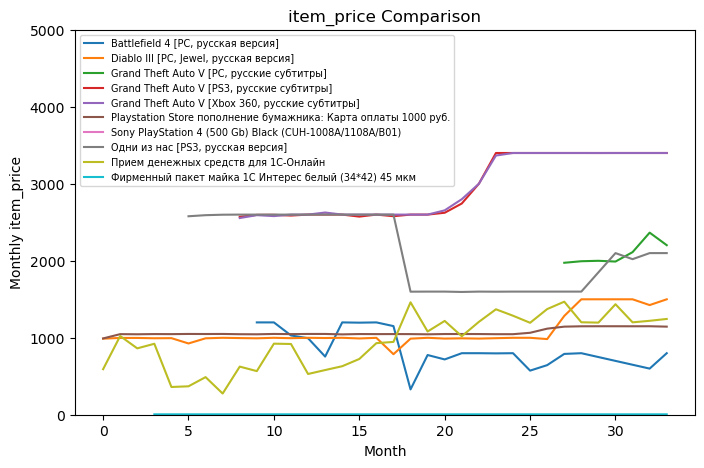

In [27]:
eda.plot_feature_comparison(
    aggregated_train_df,
    "item_price",
    "item_name",
    top_objects=top_items,
    limit_city="Москва",
    fig_size=(8, 5),
    legend_size=7,
    ylim=5000,
    agg_operation="mean",
)

### Though in general item_prices don't change as much as the "item_cnt_month" feature, some of them go up a little.

In [28]:
len(column_aggregated["item_name"])

21737

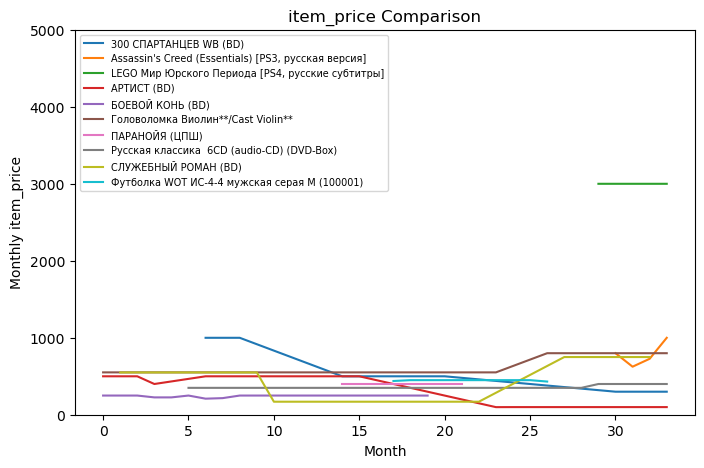

In [29]:
top_items = column_aggregated["item_name"][4000:4010].values
eda.plot_feature_comparison(
    aggregated_train_df,
    "item_price",
    "item_name",
    top_objects=top_items,
    limit_city="Москва",
    fig_size=(8, 5),
    legend_size=7,
    ylim=5000,
    agg_operation="mean",
)

### Almost the same plot for "mid-popular" items

### In general, revenue is not so informative in time context, as the item_cnt_month feature is, as it doesn't change a lot with time.

## Relationship between **item_price** and **item_cnt_month**

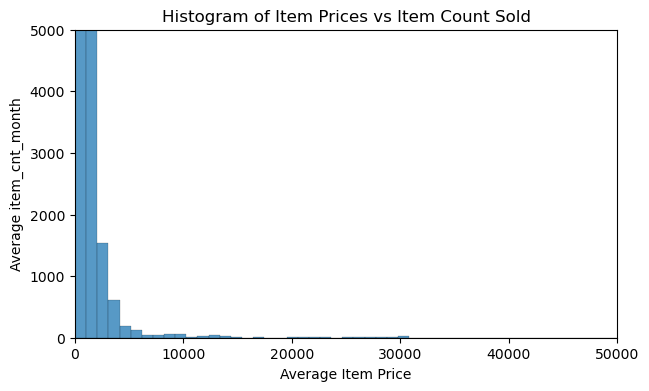

In [30]:
item_agg = (
    aggregated_train_df.groupby("item_name")
    .agg({"item_price": "mean", "item_cnt_month": "mean"})
    .reset_index()
)

plt.figure(figsize=(7, 4))
sns.histplot(
    data=item_agg, x="item_price", weights="item_cnt_month", bins=300, kde=False
)

plt.title("Histogram of Item Prices vs Item Count Sold")
plt.ylim(0, 5000)
plt.xlim(0, 50000)
plt.xlabel("Average Item Price")
plt.ylabel("Average item_cnt_month")
plt.show()

### The **item_price** feature definitely affects the number of items sold: cheaper items are sold more. So it's good to use it as a predictor for the training set.

# Look at outliers

## **item_cnt_day** feature

Plot histogram and boxplot

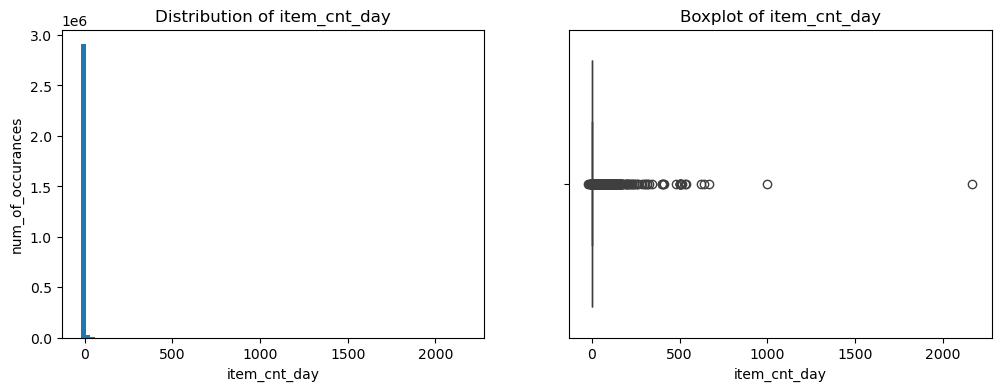

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_df["item_cnt_day"], bins=80)
ax1.set_xlabel("item_cnt_day")
ax1.set_ylabel("num_of_occurances")
ax1.set_title("Distribution of item_cnt_day")

ax2.set_title("Boxplot of item_cnt_day")
sns.boxplot(x=train_df["item_cnt_day"])
plt.show()

Let's look at other features of corresponding objects

In [32]:
train_df.sort_values("item_cnt_day", ascending=False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year,revenue
2909817,2015-10-28,33,12,11373,0.908714,2169,9,2,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС,10,2015,1971.0
2326929,2015-01-15,24,12,20949,4.000000,1000,0,2,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Интернет-магазин ЧС,1,2015,4000.0
2864234,2015-09-30,32,12,9248,1692.526123,669,8,2,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,Служебные - Билеты,Интернет-магазин ЧС,9,2015,1132300.0
2851090,2015-09-30,32,55,9249,1702.825806,637,8,2,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,Билеты (Цифра),Цифровой склад 1С-Онлайн,9,2015,1084700.0
2608039,2015-04-14,27,12,3731,1904.548096,624,3,2,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,4,2015,1188438.0


It's clear that all these objects contain real world data and don't have mistakes: high daily sales of an online shop don't look unexpected. 

Let's try to perform log transformation of **item_cnt_day** feature 

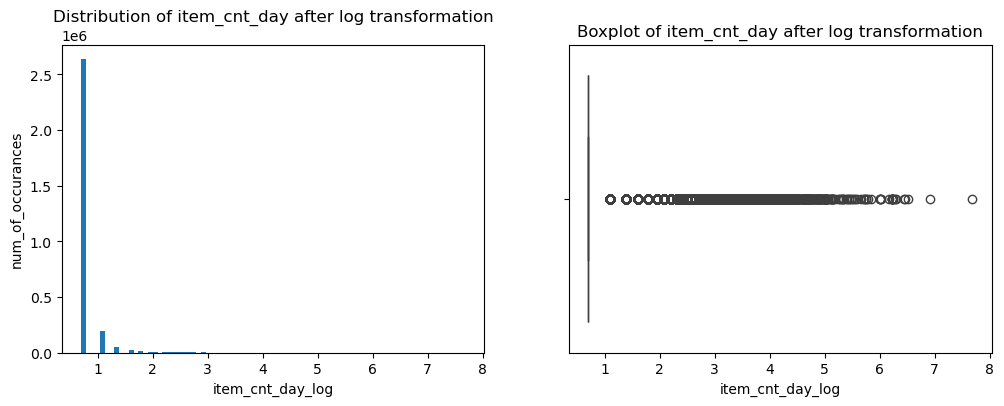

In [33]:
train_df["item_cnt_day_log"] = np.log(
    np.abs(train_df["item_cnt_day"]) + 1
)  # add 1 to avoid log(0)

# plot histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_df["item_cnt_day_log"], bins=80)
ax1.set_xlabel("item_cnt_day_log")
ax1.set_ylabel("num_of_occurances")
ax1.set_title("Distribution of item_cnt_day after log transformation")

ax2.set_title("Boxplot of item_cnt_day after log transformation")
sns.boxplot(x=train_df["item_cnt_day_log"])
plt.show()

Log transformation doesn't make data look closer to normal distribution. I'll leave outliers in the dataset for now and check how their presence affects the predictions when training models.

## **item_price** feature

Plot histogram and boxplot

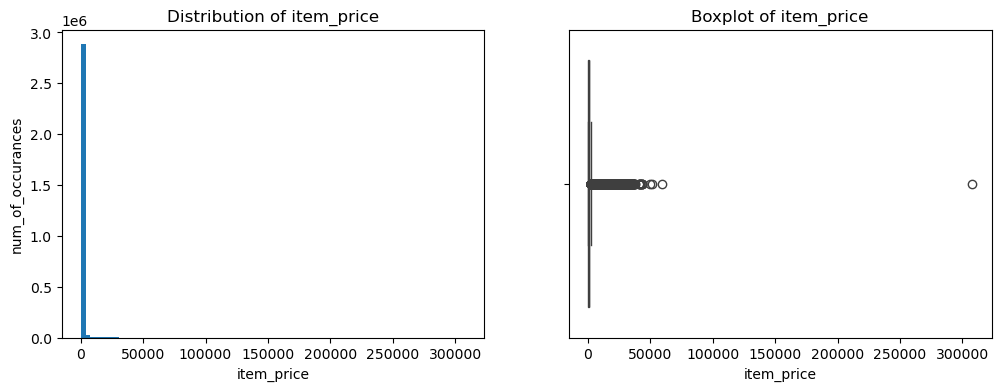

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_df["item_price"], bins=80)
ax1.set_xlabel("item_price")
ax1.set_ylabel("num_of_occurances")
ax1.set_title("Distribution of item_price")

ax2.set_title("Boxplot of item_price")
sns.boxplot(x=train_df["item_price"])
plt.show()

Let's look at other features of corresponding objects

In [35]:
train_df.sort_values("item_price", ascending=False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year,revenue,item_cnt_day_log
1163157,2013-12-13,11,12,6066,307980.0,1,11,0,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,Интернет-магазин ЧС,12,2013,307980.0,0.693147
885137,2013-09-17,8,12,11365,59200.0,1,8,0,Доставка (EMS),9,Доставка товара,Интернет-магазин ЧС,9,2013,59200.0,0.693147
1488134,2014-03-20,14,25,13199,50999.0,1,2,1,Коллекционные шахматы (Властелин Колец),69,Подарки - Сувениры,"Москва ТРК ""Атриум""",3,2014,50999.0,0.693147
2327158,2015-01-29,24,12,7241,49782.0,1,0,2,UserGate Proxy & Firewall 6.X с модулем фильтр...,75,Программы - Для дома и офиса,Интернет-магазин ЧС,1,2015,49782.0,0.693147
2931379,2015-10-20,33,22,13403,42990.0,1,9,2,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,Москва Магазин С21,10,2015,42990.0,0.693147


The prices are also reasonable - these outliers are definitely not mistakes.

Let's try to perform log transformation of **item_cnt_price** feature 

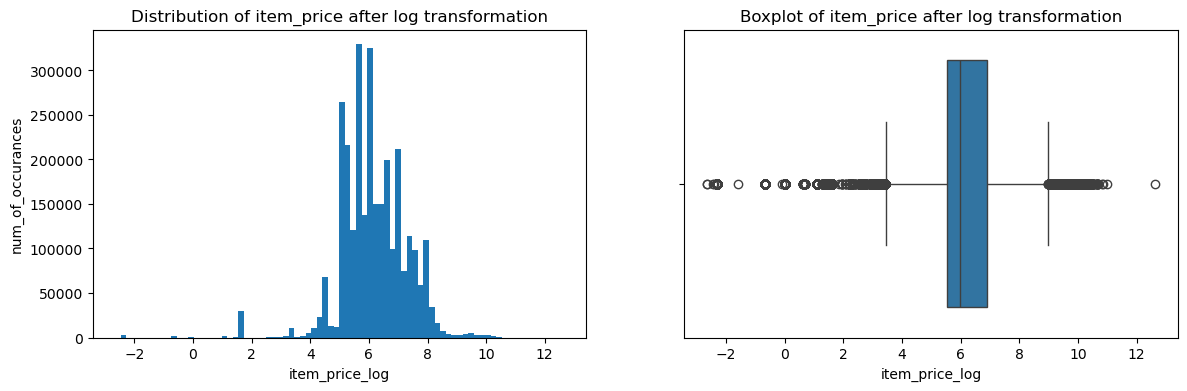

In [36]:
train_df["item_price_log"] = np.log(np.abs(train_df["item_price"]))

# plot histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.hist(train_df["item_price_log"], bins=80)
ax1.set_xlabel("item_price_log")
ax1.set_ylabel("num_of_occurances")
ax1.set_title("Distribution of item_price after log transformation")

ax2.set_title("Boxplot of item_price after log transformation")
sns.boxplot(x=train_df["item_price_log"])
plt.show()

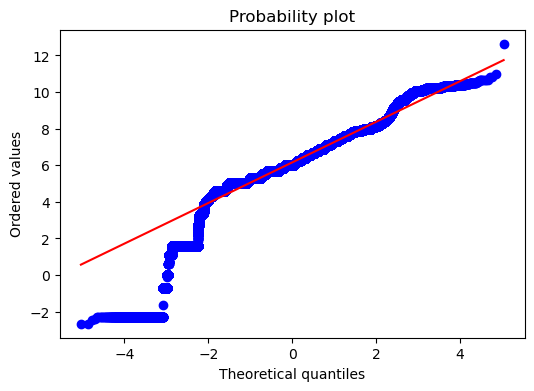

In [37]:
from scipy import stats

plt.figure(figsize=(6, 4))
ax = stats.probplot(train_df["item_price_log"], plot=plt)
plt.title("Probability plot")
# plt.legend(loc=2, prop={'size': 10})
plt.xlabel("Theoretical quantiles")
plt.ylabel("Ordered values");

The points form approximately a straight line except for the "outliers region" (ordered values under ~4, they can be seen on the boxplot above). 

I will keep **item_price_log** feature instead of the original **item_price** one for predictions

## **shop** features

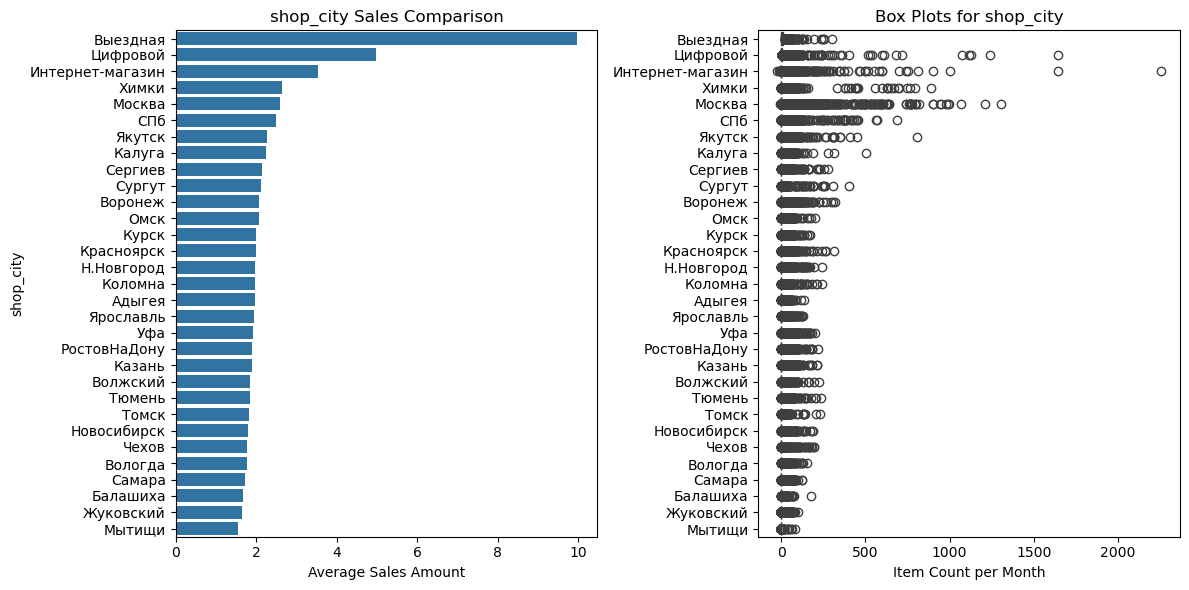

In [38]:
eda.plot_barpot_boxplot(aggregated_train_df, "shop_city", figsize=(12, 6))

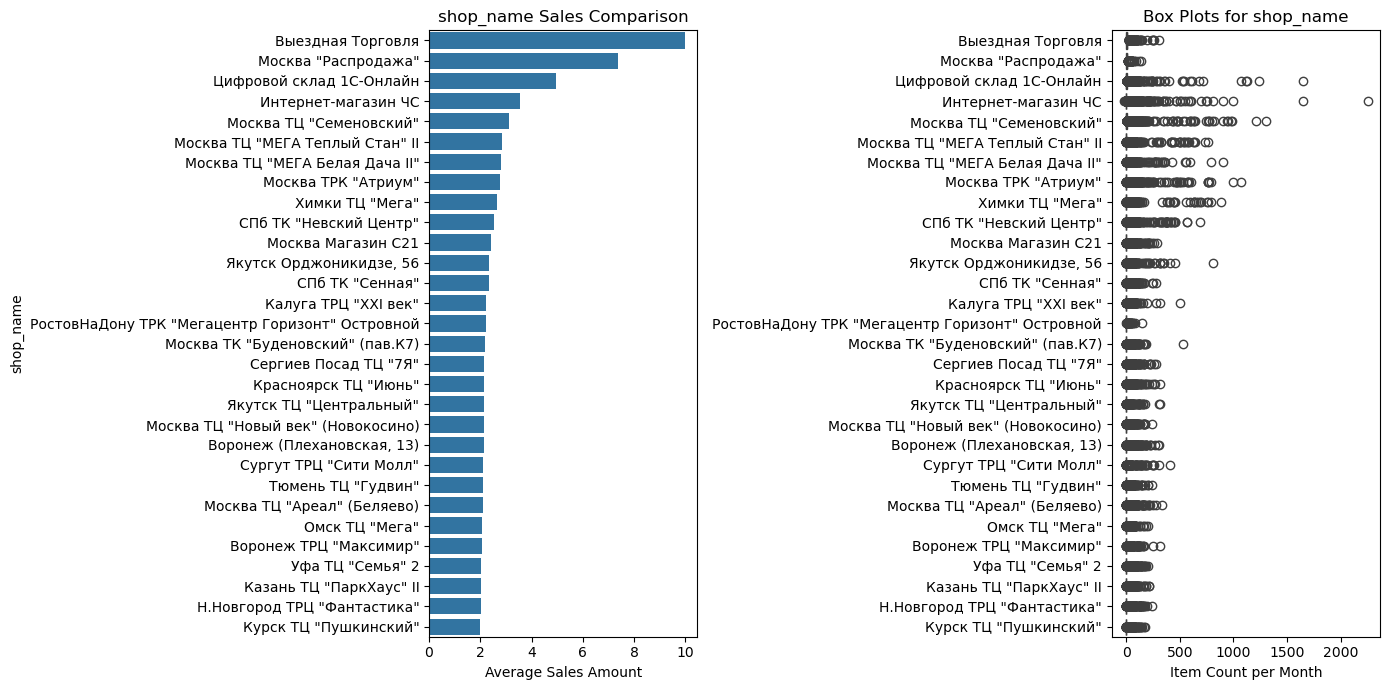

In [39]:
eda.plot_barpot_boxplot(aggregated_train_df, "shop_name", figsize=(14, 7), leave=30)

There are shops having significantly more sales than others. What's interesting, the top two of them are not in the top in terms of outliers.

## **item** features

I already cleaned the **item_name** feature from duplicates in the ETL Layer. Now I want to find some insights from the structure of a particular item name.

Let's look at items with names, that can be considered strange (in this case, the ones containing special symbols like *, /, ! and so on)

In [40]:
import re

item_names = aggregated_train_df["item_name"].unique().tolist()
item_names_strange = [
    item_name
    for item_name in item_names
    if re.search(r'[^\w\s.,\-+=:()][/"]', item_name)
]
item_names_strange[:15]

['Головоломка Дольче****/ Cast Dolce****  Арт. 476285',
 'Головоломка Мрамор****/ Cast Marble**** Арт. 473759',
 'Мини-головоломка 14**/ Mini Wire 14** Арт. 473314',
 'Мини-головоломка 9**/ Mini Wire 09** Арт. 473309',
 'Головоломка Виолин**/Cast Violin**',
 'Головоломка Сердце*****/ Cast Heart*****  Арт. 473787',
 'Головоломка Эква*****/ Cast Equa***** Арт. 473761',
 'Мини-головоломка 10***/ Mini Wire 10*** Арт. 473310',
 'Мини-головоломка 15*/ Mini Wire 15* Арт. 473315',
 'Мини-головоломка 17**/ Mini Wire 17** Арт. 473317',
 'Мини-головоломка 18**/ Mini Wire 18** Арт. 473318',
 'Мини-головоломка 3**/ Mini Wire 03** Арт. 473303',
 'Мини-головоломка 8*/ Mini Wire 08* Арт. 473308',
 'Головоломка Дуэт******/ Cast Duet******  Арт. 473769',
 'Головоломка Колодец***/ Cast Coil*** Арт. 473753']

In [41]:
print("The quantity of such items:", len(item_names_strange))

The quantity of such items: 103


Second group of unusual item names - those that start with a special symbol

In [42]:
item_names = aggregated_train_df["item_name"].unique().tolist()
item_names_strange = [
    item_name
    for item_name in item_names
    if not item_name[0].isalpha() and not item_name[0].isdigit()
]
item_names_strange

['*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь',
 '/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72',
 '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '/ОДНАЖДЫ В КИТАЕ-2',
 '/ТЫ  - ТРУП',
 '//НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион)',
 '! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '*СПАСАЯ ЭМИЛИ                           D',
 '/ПОСЛЕДНИЙ ШАНС',
 '//МОНГОЛ С.Бодров (Регион)',
 '/УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)',
 '*ЛИНИЯ СМЕРТИ                           D',
 '//АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '*ЗА ГРАНЬЮ СМЕРТИ             

Third group of unusual item names - those that end with "      D"

In [43]:
item_names_strange_D = [
    item_name for item_name in item_names if item_name.endswith("  D")
]
train_strange_names = aggregated_train_df[
    aggregated_train_df["item_name"].isin(item_names_strange_D)
]
train_strange_names[["item_name", "item_cnt_month", "item_price"]]

,item_name,item_cnt_month,item_price
1012865,***ГОЛУБАЯ ВОЛНА (Univ) D,1,100.0
1012866,***УДАР ПО ВОРОТАМ (UNI) D,1,100.0
1033495,/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/ D,1,58.0
1059009,***В ЛУЧАХ СЛАВЫ (UNV) D,1,58.0
1059010,***ГОЛУБАЯ ВОЛНА (Univ) D,1,58.0
1059011,***ЧАЙ С МУССОЛИНИ D,1,58.0
1059012,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,1,58.0
1100713,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,1,58.0
1100714,***КОРОБКА (СТЕКЛО) D,1,58.0
1100715,***ЧАЙ С МУССОЛИНИ D,1,58.0


(Un)fortunately I see nothing strange in items ending with "    D" or starting with "*" or "/"or "!". Especially when there is < 30 of them. 

However, I'm sure, that all these symbols do tell us some information about a particular item:

- Asterisk * in the beginning may be used to emphasize the importance of an item - for example, **'\*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь'** might refer to a special edition of the film. 
Moreover, the asterisks inside the item name can be used to shorten it or to illustrate the level of difficulty of a puzzle like there **'Головоломка Хеликс\*\*\*\**/Cast Helix\*\*\*\** Арт. 473757'**.
- Slash / possibly represents the name of the collection like there **'/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72'**.
- Exclamation mark ! might be used to mark software.
- " D" in the end of the name refers to the **DVD format** of the item.

Nevertheless, this information is still hardly useful for predictions, because of the small amount of observations and normal values in **"item_cnt_month"** and **"item_price"** features.

## **category** features

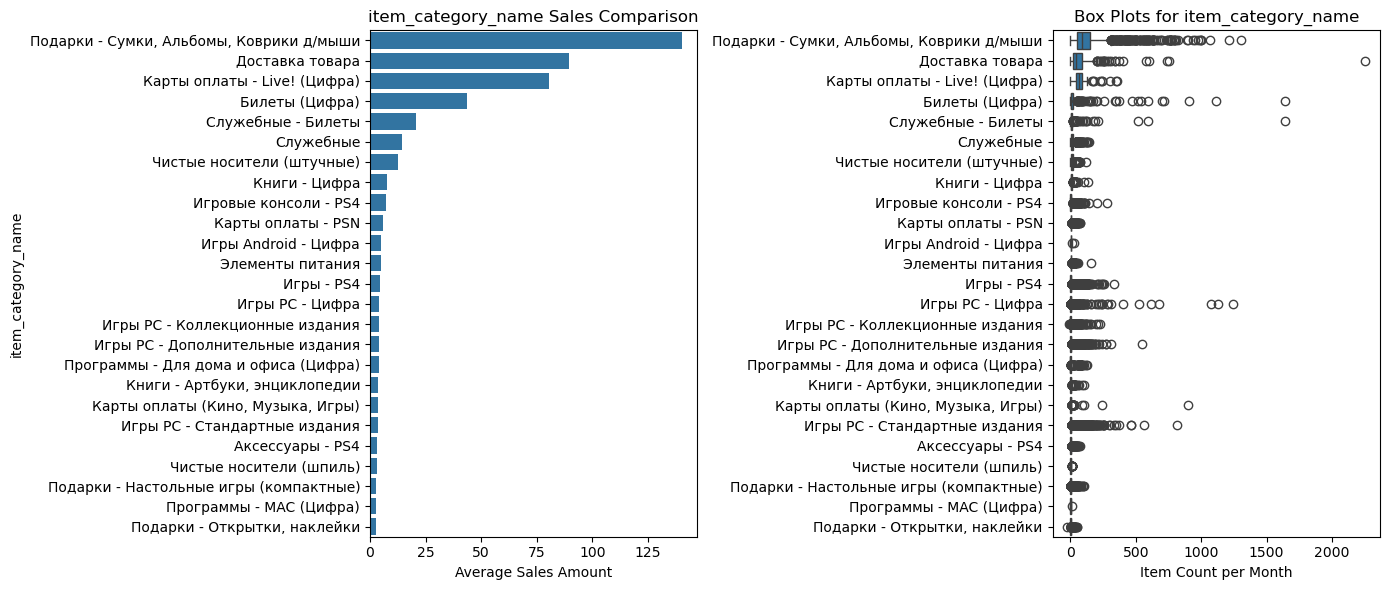

In [44]:
eda.plot_barpot_boxplot(
    aggregated_train_df, "item_category_name", figsize=(14, 6), leave=25
)

### Look at the sales distribution along large categories of items

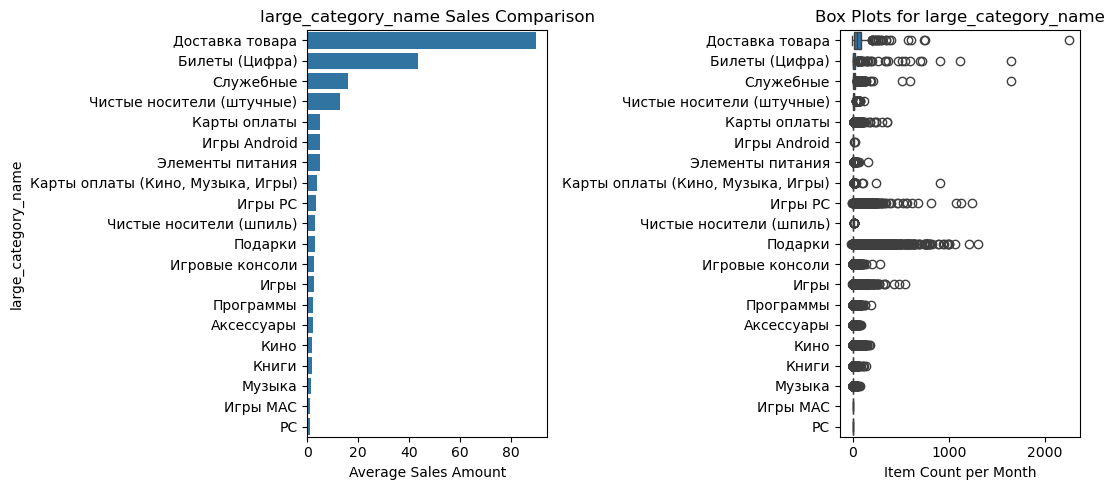

In [45]:
eda.plot_barpot_boxplot(aggregated_train_df, "large_category_name", figsize=(11, 5))

## Check correlation with heatmap

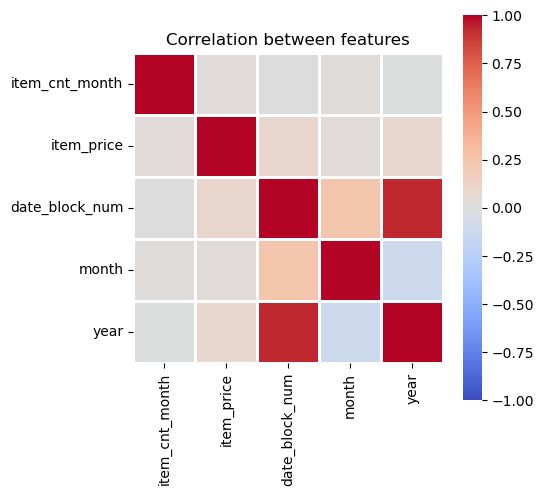

In [46]:
numeric_train_df = aggregated_train_df.select_dtypes(include=np.number)[
    ["item_cnt_month", "item_price", "date_block_num", "month", "year"]
]
f, ax = plt.subplots()
f.set_size_inches(5, 5)
ax.set_title("Correlation between features")
sns.heatmap(
    numeric_train_df.corr(),
    vmin=-1,
    vmax=1,
    center=0,
    cmap="coolwarm",
    linewidths=2,
    square=True,
);

**year** and **date_block_num** features are obviously highly correlated, but I'll leave **date_block_num** for now to use it for aggregation in the future "split into train, test, validation sets" operation. Apart from that, there is no high correlation between main features.

## **Conclusion**

Summing all up, some of the main results of the EDA Layer are:
1. There is periodicity across years as well as the decrease of **total sales** as **year** number increases. The reason for that is the decreased demand in solid copies of films, games, programs and etc.
2. Shops are not prone to close in the end of the period observed: the probability of a shop to have zero monthly sales is approximately the same in the first and in the third year.
3. Average monthly revenue of shops doesn't go up or down enough to claim there is a trend. It stays more or less the same (if we don't take holidays into consideration) due to decrease of total sales and little increase of average items price. 
4. The effect of item_price on iten_cnt_month is clear: the more the price is, the less the corresponding items were sold.
5. **"item_price"** feature gets more or less symmetric distribution after performing log transformation => I'll replace the original feature with the transformed one.
6. The outliers in the **"item_price"** and **"item_cnt_day"** features look reasonable. I will handle them when building models - they might not affect model quality.
7. Some shops, cities and categories are significantly more popular than others. In the same time the most popular ones show reduction in sales with time, while others are relatively stable.
8. Unusual special symbols found in some item names are reasonable but not useful for predictions - mostly because of the little amount of such items (~30).